# ZugerTrophy Run Review

### An exercise in the 'Split', 'Apply', 'Combine' approach where you split by the route then apply the max, avg. etc. and then combine as a new table. See this video: https://youtu.be/Wb2Tp35dZ-I 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

In [2]:
df = pd.read_csv('ZugerTrophy.csv', na_values = ['NA'])
df.head()

,Route,Date,Run_Time,Pace,Rank_Overall,Rank 40-49 (40+),Rank Men
0,02_Baar mittel 6.9 - Running\t\t\t\t\t,17.05.2018,0:47:08,6:50,123/217,45/81,86/128
1,02_Baar mittel 6.9 - Running\t\t\t\t\t,14.05.2018,0:47:48,6:56,NaN,NaN,NaN
2,02_Baar mittel 6.9 - Running\t\t\t\t\t,07.05.2018,0:48:43,7:04,NaN,NaN,NaN
3,02_Baar mittel 6.9 - Running\t\t\t\t\t,03.05.2018,0:50:57,7:23,NaN,NaN,NaN
4,02_Baar mittel 6.9 - Running\t\t\t\t\t,19.05.2018,0:51:20,7:26,NaN,NaN,NaN


In [3]:
df.dtypes

Route               object
Date                object
Run_Time            object
Pace                object
Rank_Overall        object
Rank 40-49 (40+)    object
Rank Men            object
dtype: object

In [4]:
#remove unnecessary columns from the dataframe
df.drop(['Rank_Overall', 'Rank 40-49 (40+)', 'Rank Men'], axis=1, inplace=True)
df.head()


,Route,Date,Run_Time,Pace
0,02_Baar mittel 6.9 - Running\t\t\t\t\t,17.05.2018,0:47:08,6:50
1,02_Baar mittel 6.9 - Running\t\t\t\t\t,14.05.2018,0:47:48,6:56
2,02_Baar mittel 6.9 - Running\t\t\t\t\t,07.05.2018,0:48:43,7:04
3,02_Baar mittel 6.9 - Running\t\t\t\t\t,03.05.2018,0:50:57,7:23
4,02_Baar mittel 6.9 - Running\t\t\t\t\t,19.05.2018,0:51:20,7:26


In [5]:
#strip out the distance to a separate column

#split_df = df['Route'].str.split('(.\d\.\d+|14)', expand=True)
split_df = df['Route'].str.split(' ', expand=True)
split_df.tail(6)

,0,1,2,3,4
170,03_Ennetsee,kurz,2.2,-,Walking\t\t\t\t\t
171,03_Ennetsee,kurz,2.2,-,Walking\t\t\t\t\t
172,03_Ennetsee,mittel,5.1,-,Running\t\t\t\t\t
173,03_Ennetsee,mittel,5.1,-,Running\t\t\t\t\t
174,03_Ennetsee,mittel,5.1,-,Running\t\t\t\t\t
175,03_Ennetsee,mittel,5.1,-,Walking\t\t\t\t\t


In [6]:
#check that the split is ok in the middle of the file
#split_df.loc[87:91]

In [7]:
#create a categorical dtype to be used for the route lengths
from pandas.api.types import CategoricalDtype
ordered_cat = CategoricalDtype(['kurz', 'mittel', 'lang'], ordered=True)

In [8]:
#add back key columns from split df to the original df
df['Distance'] = pd.to_numeric(split_df[2])
#df['Exercise'] = split_df[4].replace('[\- ]', '', regex=True)
df['Exercise'] = split_df[4]
df['Exercise'] = df['Exercise'].replace('[\\t\t\t ]', '', regex=True)
df['Route'] = df['Route'].replace('[\t\t]', '', regex=True)
df['Route1'] = split_df[0]
df['Route2'] = split_df[1].astype(ordered_cat)
df.head()

,Route,Date,Run_Time,Pace,Distance,Exercise,Route1,Route2
0,02_Baar mittel 6.9 - Running,17.05.2018,0:47:08,6:50,6.9,Running,02_Baar,mittel
1,02_Baar mittel 6.9 - Running,14.05.2018,0:47:48,6:56,6.9,Running,02_Baar,mittel
2,02_Baar mittel 6.9 - Running,07.05.2018,0:48:43,7:04,6.9,Running,02_Baar,mittel
3,02_Baar mittel 6.9 - Running,03.05.2018,0:50:57,7:23,6.9,Running,02_Baar,mittel
4,02_Baar mittel 6.9 - Running,19.05.2018,0:51:20,7:26,6.9,Running,02_Baar,mittel


In [9]:
#adjust the dtypes
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['Run_Time'] = pd.to_timedelta(df['Run_Time'], unit='s')

# to_tmedelta to average pace column but add '00:' to get %H%M%S format
df['Pace'] = pd.to_timedelta('00:'+df['Pace'])

df.dtypes

Route                object
Date         datetime64[ns]
Run_Time    timedelta64[ns]
Pace        timedelta64[ns]
Distance            float64
Exercise             object
Route1               object
Route2             category
dtype: object

In [10]:
#this would remove the walking routes - but I prefer to split it out
patternDel = "Walking"
filter = df['Route'].str.contains(patternDel)
df = df[~filter]
df

,Route,Date,Run_Time,Pace,Distance,Exercise,Route1,Route2
0,02_Baar mittel 6.9 - Running,2018-05-17,00:47:08,00:06:50,6.9,Running,02_Baar,mittel
1,02_Baar mittel 6.9 - Running,2018-05-14,00:47:48,00:06:56,6.9,Running,02_Baar,mittel
2,02_Baar mittel 6.9 - Running,2018-05-07,00:48:43,00:07:04,6.9,Running,02_Baar,mittel
3,02_Baar mittel 6.9 - Running,2018-05-03,00:50:57,00:07:23,6.9,Running,02_Baar,mittel
4,02_Baar mittel 6.9 - Running,2018-05-19,00:51:20,00:07:26,6.9,Running,02_Baar,mittel
...,...,...,...,...,...,...,...,...
168,03_Ennetsee kurz 2.2 - Running,2020-05-06,00:13:02,00:05:55,2.2,Running,03_Ennetsee,kurz
169,03_Ennetsee kurz 2.2 - Running,2020-05-06,00:14:17,00:06:30,2.2,Running,03_Ennetsee,kurz
172,03_Ennetsee mittel 5.1 - Running,2020-05-04,00:25:40,00:05:02,5.1,Running,03_Ennetsee,mittel
173,03_Ennetsee mittel 5.1 - Running,2020-05-06,00:26:48,00:05:15,5.1,Running,03_Ennetsee,mittel


In [11]:
#create a dataframe groupby object with 'key' as the Route. This is 'splitting' the dataset
g = df.groupby('Route')
g

In [12]:
#let's have a look at the dataframe
for Route, Route_df in g:
    print(Route)
    print(Route_df)

01_Steinhausen kurz 2.8 - Running
                                 Route       Date Run_Time     Pace  Distance  \
50   01_Steinhausen kurz 2.8 - Running 2019-04-13 00:14:24 00:05:09       2.8   
51   01_Steinhausen kurz 2.8 - Running 2019-04-06 00:15:13 00:05:26       2.8   
52   01_Steinhausen kurz 2.8 - Running 2019-04-15 00:16:31 00:05:54       2.8   
53   01_Steinhausen kurz 2.8 - Running 2019-04-08 00:18:33 00:06:38       2.8   
54   01_Steinhausen kurz 2.8 - Running 2019-04-04 00:19:25 00:06:56       2.8   
55   01_Steinhausen kurz 2.8 - Running 2019-03-30 00:20:39 00:07:23       2.8   
56   01_Steinhausen kurz 2.8 - Running 2019-03-23 00:20:45 00:07:25       2.8   
154  01_Steinhausen kurz 2.8 - Running 2020-04-07 00:15:12 00:05:26       2.8   

    Exercise          Route1 Route2  
50   Running  01_Steinhausen   kurz  
51   Running  01_Steinhausen   kurz  
52   Running  01_Steinhausen   kurz  
53   Running  01_Steinhausen   kurz  
54   Running  01_Steinhausen   kurz  
55   Run

In [13]:
#Look at a specific route in the dataframe
g.get_group('06_Ägerital kurz 2.4 - Running')

,Route,Date,Run_Time,Pace,Distance,Exercise,Route1,Route2
28,06_Ägerital kurz 2.4 - Running,2018-09-13,00:12:47,00:05:20,2.4,Running,06_Ägerital,kurz
29,06_Ägerital kurz 2.4 - Running,2018-09-13,00:16:13,00:06:45,2.4,Running,06_Ägerital,kurz
30,06_Ägerital kurz 2.4 - Running,2018-09-15,00:18:41,00:07:47,2.4,Running,06_Ägerital,kurz
31,06_Ägerital kurz 2.4 - Running,2018-09-20,00:26:40,00:11:07,2.4,Running,06_Ägerital,kurz
121,06_Ägerital kurz 2.4 - Running,2019-10-03,00:13:46,00:05:44,2.4,Running,06_Ägerital,kurz
122,06_Ägerital kurz 2.4 - Running,2019-09-30,00:14:17,00:05:57,2.4,Running,06_Ägerital,kurz
123,06_Ägerital kurz 2.4 - Running,2019-10-01,00:14:20,00:05:58,2.4,Running,06_Ägerital,kurz


In [14]:
#get my records. This is where you 'apply' a function such as 'min' and 'combine' a new dataframe
g1 = g.min()
g1

,Date,Run_Time,Pace,Distance,Exercise,Route1,Route2
Route,,,,,,,
01_Steinhausen kurz 2.8 - Running,2019-03-23,00:14:24,00:05:09,2.8,Running,01_Steinhausen,kurz
01_Steinhausen lang 12.3 - Running,2019-04-01,01:06:20,00:05:24,12.3,Running,01_Steinhausen,lang
01_Steinhausen mittel 8.4 - Running,2019-03-25,00:44:01,00:05:14,8.4,Running,01_Steinhausen,mittel
02_Baar kurz 2.7 - Running,2019-05-04,00:15:41,00:05:49,2.7,Running,02_Baar,kurz
02_Baar lang 14.6 - Running,2019-05-02,01:52:47,00:07:43,14.6,Running,02_Baar,lang
02_Baar mittel 6.9 - Running,2018-05-03,00:41:36,00:06:02,6.9,Running,02_Baar,mittel
03_Ennetsee kurz 2.2 - Running,2018-06-11,00:11:51,00:05:23,2.2,Running,03_Ennetsee,kurz
03_Ennetsee lang 14 - Running,2019-05-23,01:28:23,00:06:19,14.0,Running,03_Ennetsee,lang
03_Ennetsee mittel 5.1 - Running,2018-06-04,00:25:40,00:05:02,5.1,Running,03_Ennetsee,mittel


In [15]:
#Paces = [5.09, 5.24, 5.14, 5.49, 7.43, 6.02, 4.30, 6.19, 5.02, 5.21, 6.19, 5.42, 5.32, 6.11, 4.39, 5.20, 5.31, 4.55, 4.46]
#Routes = ['Steinhausen kurz 2.8', 'Steinhausen lang 12.3', 'Steinhausen mittel 8.4', 'Baar kurz 2.7', 'Baar lang 14.6', '02_Baar mittel 6.9', '03_Ennetsee kurz 2.2', '03_Ennetsee lang 14', '03_Ennetsee mittel 5.1', '04_Menzingen kurz 3.6', '04_Menzingen lang 14.0', '04_Menzingen mittel 8.1', '05_Zug kurz 2.1', '05_Zug lang 16.8', '05_Zug mittel 5.9', '06_Ägerital kurz 2.4', '06_Ägerital lang 17.2', '06_Ägerital mittel 3.9', 'Winter-Challenge Zug 5.9']
Routes = g1['Route1']
Routes2 = g1['Route2']
Distance = g1['Distance']
Time = g1['Run_Time']
Paces = g1['Pace']
pbs = {'Route1':Routes, 'Version':Routes2, 'Distance':Distance, 'Run_Time':Time, 'Pace':Paces}
df = pd.DataFrame(pbs)
df

,Route1,Version,Distance,Run_Time,Pace
Route,,,,,
01_Steinhausen kurz 2.8 - Running,01_Steinhausen,kurz,2.8,00:14:24,00:05:09
01_Steinhausen lang 12.3 - Running,01_Steinhausen,lang,12.3,01:06:20,00:05:24
01_Steinhausen mittel 8.4 - Running,01_Steinhausen,mittel,8.4,00:44:01,00:05:14
02_Baar kurz 2.7 - Running,02_Baar,kurz,2.7,00:15:41,00:05:49
02_Baar lang 14.6 - Running,02_Baar,lang,14.6,01:52:47,00:07:43
02_Baar mittel 6.9 - Running,02_Baar,mittel,6.9,00:41:36,00:06:02
03_Ennetsee kurz 2.2 - Running,03_Ennetsee,kurz,2.2,00:11:51,00:05:23
03_Ennetsee lang 14 - Running,03_Ennetsee,lang,14.0,01:28:23,00:06:19
03_Ennetsee mittel 5.1 - Running,03_Ennetsee,mittel,5.1,00:25:40,00:05:02


In [16]:
#df1 = df.sort_values(by='Pace', ascending=True).reset_index(drop=True)
df1 = df.sort_values(['Route1', 'Version'], ascending=(True, True)).reset_index(drop=True)
df1

,Route1,Version,Distance,Run_Time,Pace
0,01_Steinhausen,kurz,2.8,00:14:24,00:05:09
1,01_Steinhausen,mittel,8.4,00:44:01,00:05:14
2,01_Steinhausen,lang,12.3,01:06:20,00:05:24
3,02_Baar,kurz,2.7,00:15:41,00:05:49
4,02_Baar,mittel,6.9,00:41:36,00:06:02
5,02_Baar,lang,14.6,01:52:47,00:07:43
6,03_Ennetsee,kurz,2.2,00:11:51,00:05:23
7,03_Ennetsee,mittel,5.1,00:25:40,00:05:02
8,03_Ennetsee,lang,14.0,01:28:23,00:06:19
9,04_Menzingen,kurz,3.6,00:19:14,00:05:21


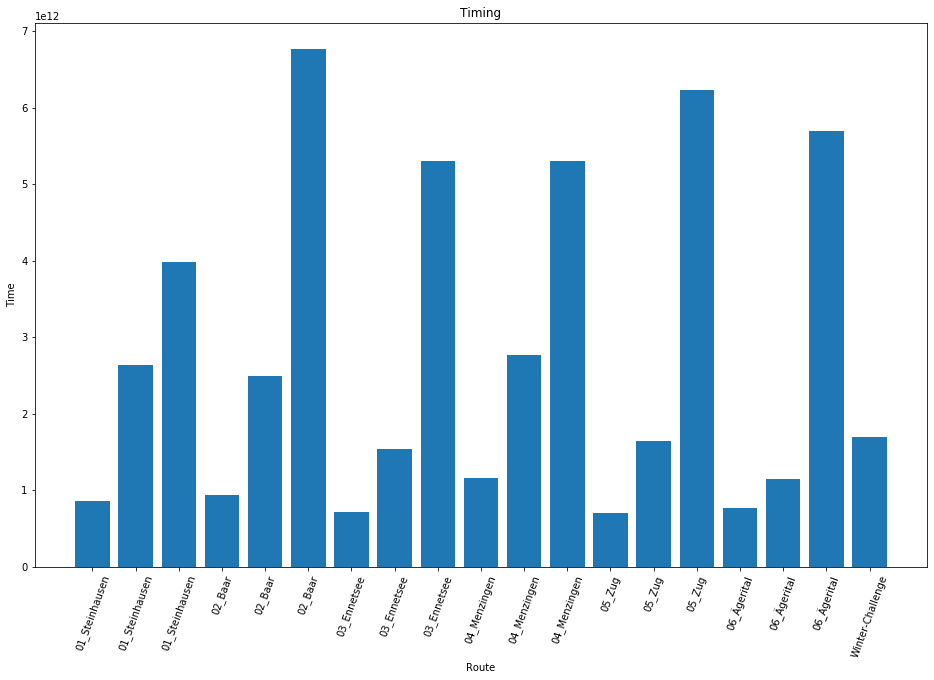

In [17]:
#plot the times

plt.figure(figsize=(16, 10))
# Make a  dataset:
bars = (df1.Route1)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, df1.Run_Time)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(rotation=70)

# Add labels
plt.xlabel("Route")
plt.ylabel("Time")
plt.title("Timing")

# Show graphic and save
plt.savefig('Timing')
plt.show()



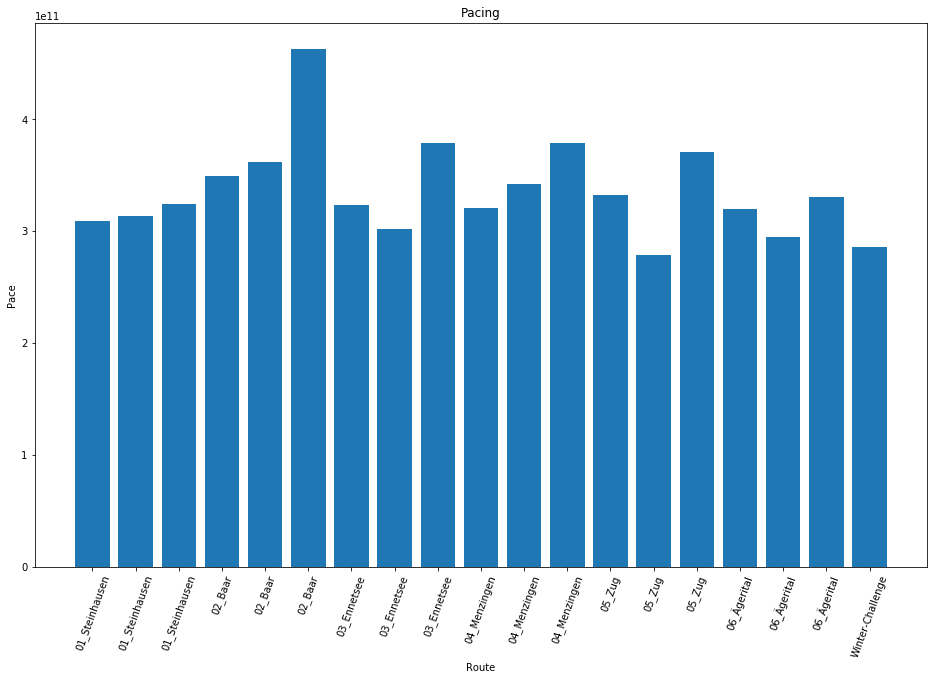

In [18]:
#plot the pace

plt.figure(figsize=(16, 10))
# Make a  dataset:
bars = (df1.Route1)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, df1.Pace)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(rotation=70)

# Add labels
plt.xlabel("Route")
plt.ylabel("Pace")
plt.title("Pacing")


# Show graphic
plt.savefig('Pacing')
plt.show()


In [19]:
# %matplotlib inline
# plt.plot(g.index.to_pydatetime().dropna(), g.NbFluxEntrant.dropna())